Про модификацию свойств потока флюидов при сепарации части свободного газа из потока

In [1]:
"""
Импорт унифлока зависит от корректных путей к надстройке
Путь задается вручную в явном виде (так проще всего)
"""

unifloc_path = r'D:\unifloc\unifloc_vba'
unifloc_xlam = unifloc_path +r'\UniflocVBA_7.xlam'
print('Путь к надстройке Unifloc VBA -- '+ unifloc_xlam)

import sys
sys.path.insert(0, unifloc_path)  # добавим в путь поиска пакетов python папку где находится репозиторий Unifloc VBA

import unifloc_vba_python_api.python_api as unifloc   # импортируем python_api для Unifloc VBA

# создаем объект имеющий доступ к расчетам Unifloc VBA
unf = unifloc.API(unifloc_xlam)

print('объект unf обеспечивает доступ к API Unifloc VBA')

Путь к надстройке Unifloc VBA -- D:\unifloc\unifloc_vba\UniflocVBA_7.xlam
объект unf обеспечивает доступ к API Unifloc VBA


In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

Создадим флюид с параметрами 
- $\gamma_{gas} = 0.8 $
- $\gamma_{oil} = 0.82 $
- $r_{sb} = 0.8 $

In [3]:
fluid = unf.encode_PVT(gamma_gas = 0.8, 
                       gamma_oil = 0.82,
                       rsb_m3m3 = 120
                      )
print(fluid)

{"gamma_gas":0.8,"gamma_oil":0.82,"gamma_wat":1,"rsb_m3m3":120,"PVT_corr_set":0}


In [4]:
type(fluid)

str

В результате получили строку. Сделали это методами unifloc vba, но можно было пока обойтись и число python функциями.

Найдем давление насыщения для созданного флюида и построим графики зависимости газосодержания от давления, объемного коэффициента нефти от давления и вязкости нефти от давления.

In [5]:
t_res_C = 80
pb = unf.PVT_pb_atma(t_C = t_res_C, PVT_prop = fluid)

In [6]:
pb

146.4261947356527

In [7]:
rs = np.vectorize(unf.PVT_rs_m3m3)

In [8]:
# сформируем массив давлений для которых будем строить график
# для того, чтобы график был красивый, проследим, 
# чтобы в наборе точек обязательно было давление насыщения
p_list = np.unique(np.append(np.linspace(1,300,10), pb))

rs_list = rs(p_list, t_res_C, fluid)

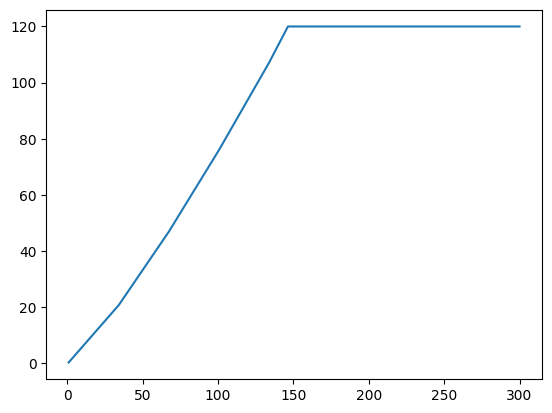

In [9]:
plt.plot(p_list, rs_list)
plt.show()

In [10]:
fluid_sep = unf.feed_mod_separate_gas(0.5, 50, 80, fluid)

In [11]:
fluid_sep

'{"gamma_gas":0.8,"gamma_oil":0.82,"gamma_wat":1,"rsb_m3m3":32.713,"pb_atma":51.83,"t_res_C":90,"bob_m3m3":1.151,"muob_cP":0.688,"PVT_corr_set":0,"q_liq_sm3day":0.1,"fw_perc":0,"rp_m3m3":76.356}'

In [12]:
p_list

array([  1.        ,  34.22222222,  67.44444444, 100.66666667,
       133.88888889, 146.42619474, 167.11111111, 200.33333333,
       233.55555556, 266.77777778, 300.        ])

In [13]:
rs(p_list, t_res_C, fluid)

array([  0.29454893,  20.72356793,  46.90386708,  75.96819652,
       107.09220753, 120.        , 120.        , 120.        ,
       120.        , 120.        , 120.        ])

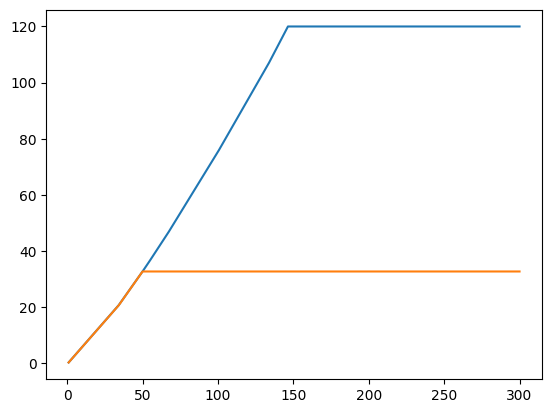

In [16]:
p_list = np.unique(np.append(p_list, 55))

plt.plot(p_list, rs(p_list, t_res_C, fluid))
plt.plot(p_list, rs(p_list, t_res_C, fluid_sep))

plt.show()

In [108]:
class Xarray:
    array = np.array([])
    
    def add(self, vals):
        self.array = np.unique( np.append(self.array, vals) )
        return self.array
    

In [109]:
xval = Xarray()

In [110]:
xval.array

array([], dtype=float64)

In [113]:
xval.add(vals=np.linspace(1,10,2))

array([ 1.        ,  1.31034483,  1.62068966,  1.93103448,  2.24137931,
        2.55172414,  2.86206897,  3.17241379,  3.48275862,  3.79310345,
        4.10344828,  4.4137931 ,  4.72413793,  5.03448276,  5.34482759,
        5.65517241,  5.96551724,  6.27586207,  6.5862069 ,  6.89655172,
        7.20689655,  7.51724138,  7.82758621,  8.13793103,  8.44827586,
        8.75862069,  9.06896552,  9.37931034,  9.68965517, 10.        ])

In [117]:
xval.add(2)

array([ 1.        ,  1.31034483,  1.62068966,  1.93103448,  2.        ,
        2.24137931,  2.55172414,  2.86206897,  3.17241379,  3.48275862,
        3.79310345,  4.10344828,  4.4137931 ,  4.72413793,  5.03448276,
        5.34482759,  5.65517241,  5.96551724,  6.27586207,  6.5862069 ,
        6.89655172,  7.20689655,  7.51724138,  7.82758621,  8.13793103,
        8.44827586,  8.75862069,  9.06896552,  9.37931034,  9.68965517,
       10.        , 12.        ])